In [1]:
# 6 Information theory
import numpy as np

def entropy(Ps1):
    Ps1=Ps1[Ps1!=0]
    return -(Ps1*np.log2(Ps1)).sum()

Ps1=np.array([0.5,0.25,0.25])
Entropy1=entropy(Ps1)
print(Entropy1)

1.5


In [2]:
# The discrete distribution with maximum entropy is the uniform distribution
Ps_balanced=np.ones(3)/3
Entropy_balanced=entropy(Ps_balanced)
print(Entropy_balanced)

1.584962500721156


In [3]:
# Conversely, the distribution with minimum entropy (which is zero) is any delta-function that puts all
# its mass on one state. Such a distribution has no uncertainty.
Ps_Constant=np.array([1,0,0])
Ps_Constant=entropy(Ps_Constant)
print(Ps_Constant)

Ps_ExtremelyUnbalanced=np.array([0.99,0.005,0.005])
Entropy_ExtremelyUnbalanced=entropy(Ps_ExtremelyUnbalanced)
print(Entropy_ExtremelyUnbalanced)

-0.0
0.09079313589591118


In [4]:
#6.1.3 Joint entropy

print(entropy(np.array([0.5,0.5])))

print(entropy(np.array([1/8,1/8,3/8,3/8])))

1.0
1.811278124459133


In [6]:
def primesfrom2to(n):
    # http://stackoverflow.com/questions/2068372/fastest-way-to-list-all-primes-below-n-in-python/3035188#3035188
    """ Input n>=6, Returns a array of primes, 2 <= p < n """
    sieve = np.ones(n//3 + (n%6==2), dtype=np.bool)
    sieve[0] = False
    for i in range(int(n**0.5)//3+1):
        if sieve[i]:
            k=3*i+1|1
            sieve[      ((k*k)//3)      ::2*k] = False
            sieve[(k*k+4*k-2*k*(i&1))//3::2*k] = False
    return np.r_[2,3,((3*np.nonzero(sieve)[0]+1)|1)]

# generate 100.000 random integers from 1 to 1.000.000.000
a1 = np.arange(1,9)
# generate all primes that are equal or less than a1.max() 
primes = primesfrom2to(a1.max())

# print result    
print(np.intersect1d(primes, a1))


[2 3 5 7]


In [10]:
X=np.mod(a1+1,2)
Y=np.in1d(a1,primes)
print(X,Y)

[0 1 0 1 0 1 0 1] [False  True  True False  True False  True False]


#Conditional entropy

\$H(Y|X)= E_{p(X)} [H (p(Y|X))]$



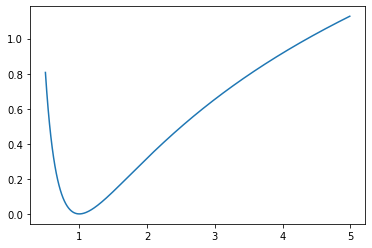

In [14]:
import matplotlib.pyplot as plt

X2_var=np.arange(0.5,5,0.01)
plt.plot(X2_var,np.log(X2_var)+1/2/X2_var**2-0.5)